In [1]:
import numpy as np
import matplotlib.image as img
import os
import random
from matplotlib import pyplot as plt


images = {}
for filename in os.listdir('StarterFiles/Test1'): # should be Train1
    images[filename] = img.imread('StarterFiles/Test1/' + filename) # should be Train1

    
col = 130
row = 150

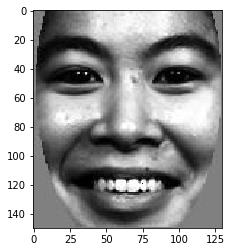

In [2]:
example_img_name = list(images.keys())[24]
plt.imshow(images[example_img_name], ) #display the image 
plt.gray()  #grayscale conversion
plt.show()

In [3]:
# convert each to N^2 x 1 matrix

flattened = {}

for key in images:
    flattened[key] = images[key].flatten()

In [4]:
mean = np.zeros(len(flattened[example_img_name]))
for key in flattened: 
    mean += flattened[key]

mean /= len(flattened.keys())

mean

array([129.11363636, 129.52272727, 130.29545455, ..., 129.18181818,
       129.18181818, 129.18181818])

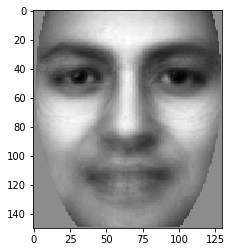

In [5]:
# just for fun, lets take a peek at the mean face :)

MEANFACE = mean.reshape(150, 130)
plt.imshow(MEANFACE, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

In [6]:
mean

array([129.11363636, 129.52272727, 130.29545455, ..., 129.18181818,
       129.18181818, 129.18181818])

In [7]:
mean_adjusted = {}

for key in flattened: 
    mean_adjusted[key] = flattened[key] - mean


In [8]:
data = list(mean_adjusted.values())
data = [c.reshape(-1,1) for c in data]
a = np.column_stack(tuple(data))

covar = a @ a.T
covar

array([[ 284.43181818,   24.38636364, -103.47727273, ...,   44.09090909,
          44.09090909,   44.09090909],
       [  24.38636364,  466.97727273, -161.79545455, ...,   23.81818182,
          23.81818182,   23.81818182],
       [-103.47727273, -161.79545455,  555.15909091, ...,   82.63636364,
          82.63636364,   82.63636364],
       ...,
       [  44.09090909,   23.81818182,   82.63636364, ...,   62.54545455,
          62.54545455,   62.54545455],
       [  44.09090909,   23.81818182,   82.63636364, ...,   62.54545455,
          62.54545455,   62.54545455],
       [  44.09090909,   23.81818182,   82.63636364, ...,   62.54545455,
          62.54545455,   62.54545455]])

In [9]:
covar2 = a.T @ a
covar2

array([[ 50084963.50413224,  12070754.66322314,   2047600.59504132, ...,
        -12929466.56404958,   2777454.93595041,  -3376702.72314049],
       [ 12070754.66322314,  45114649.82231405,   1644988.75413223, ...,
        -11950738.40495868,   1147473.09504133,   2045941.43595041],
       [  2047600.59504132,   1644988.75413223,  41108554.68595041, ...,
         -2990246.47314049,    341333.02685951,  -2282648.6322314 ],
       ...,
       [-12929466.56404958, -11950738.40495868,  -2990246.47314049, ...,
         74190595.36776863,  -9806102.1322314 ,   6922917.20867769],
       [  2777454.93595041,   1147473.09504133,    341333.02685951, ...,
         -9806102.1322314 ,  42077455.36776861,   7108855.70867769],
       [ -3376702.72314049,   2045941.43595041,  -2282648.6322314 , ...,
          6922917.20867769,   7108855.70867769,  38067625.04958677]])

In [10]:
covar2_eigvals, covar2_eigvecs = np.linalg.eig(covar2)

In [11]:
covar_eigvecs = a @ covar2_eigvecs 
covar_eigvecs

array([[ 0.72707316,  2.55300763, -3.47134396, ..., -1.62430719,
         3.37452839, -2.42711944],
       [ 1.30422134,  5.97309403, -0.4391237 , ..., -0.78697789,
         2.17719915, -0.16988577],
       [ 8.24886608,  1.31965678,  1.2019256 , ...,  5.01599731,
        -4.29213513, -4.18504754],
       ...,
       [ 1.52627237,  1.73097445, -0.11840968, ..., -0.08312145,
         0.13646092, -0.69948028],
       [ 1.52627237,  1.73097445, -0.11840968, ..., -0.08312145,
         0.13646092, -0.69948028],
       [ 1.52627237,  1.73097445, -0.11840968, ..., -0.08312145,
         0.13646092, -0.69948028]])

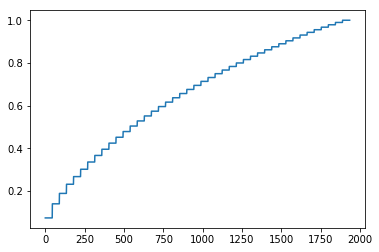

In [12]:
U,S,V = np.linalg.svd(a,full_matrices=False)
sigmas=np.diag(S)
plt.plot(np.cumsum(sigmas)/np.sum(sigmas))

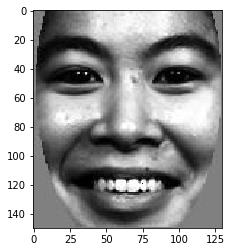

In [13]:
plt.imshow(images[example_img_name], ) #display the image 
plt.gray()  #grayscale conversion
plt.show()

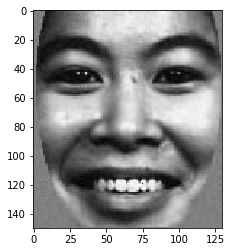

In [14]:
U,S,V = np.linalg.svd(images[example_img_name],full_matrices=False)
k = 30
new_image = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
plt.imshow(new_image, interpolation='nearest')
plt.gray()  #grayscale conversion
plt.show()

In [15]:
normalized = covar_eigvecs.copy()

for i in range(0, normalized.shape[1]):
    normalized[:,i] = normalized[:,i]/np.linalg.norm(normalized[:,i])
    
normalized

array([[ 3.38113546e-05,  1.34373343e-04, -2.47452289e-04, ...,
        -4.05175823e-04,  8.30112394e-04, -6.00638742e-04],
       [ 6.06506921e-05,  3.14383947e-04, -3.13026213e-05, ...,
        -1.96307950e-04,  5.35577063e-04, -4.20415956e-05],
       [ 3.83600100e-04,  6.94579569e-05,  8.56784132e-05, ...,
         1.25121704e-03, -1.05583778e-03, -1.03567285e-03],
       ...,
       [ 7.09768139e-05,  9.11069837e-05, -8.44074973e-06, ...,
        -2.07342563e-05,  3.35685127e-05, -1.73100240e-04],
       [ 7.09768139e-05,  9.11069837e-05, -8.44074973e-06, ...,
        -2.07342563e-05,  3.35685127e-05, -1.73100240e-04],
       [ 7.09768139e-05,  9.11069837e-05, -8.44074973e-06, ...,
        -2.07342563e-05,  3.35685127e-05, -1.73100240e-04]])

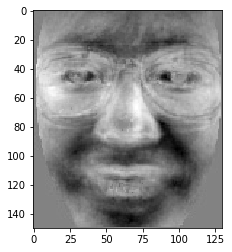

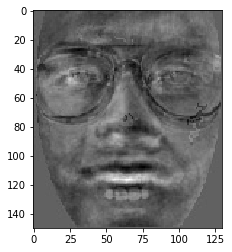

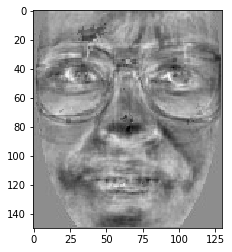

In [24]:
# lets take a peek at some of the eigenfaces 

eigenface = normalized[:,2].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')

eigenface = normalized[:,12].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')

# cursed
eigenface = normalized[:,23].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')

In [17]:
k_eigenfaces = normalized.copy()
k_eigenfaces = k_eigenfaces[:,0:k]
k_eigenfaces.shape

(19500, 30)

array([[-0.11363636],
       [ 0.47727273],
       [ 0.70454545],
       ...,
       [-1.18181818],
       [-1.18181818],
       [-1.18181818]])

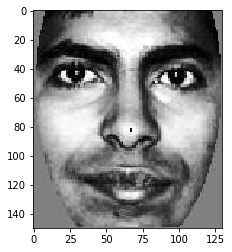

In [36]:
random_test_filename = random.choice(os.listdir('StarterFiles/Test1'))
rand_face = img.imread('StarterFiles/Test1/' + random_test_filename)
plt.figure()
plt.imshow(rand_face,cmap='gray')
rand_flat_face = rand_face.flatten()
mean_adj_rand_face = rand_flat_face - mean
face_col = mean_adj_rand_face.reshape(-1,1)
face_col

In [37]:
omega = k_eigenfaces.T @ face_col
omega.shape

(30, 1)

In [38]:
k_eigenfaces.shape

(19500, 30)

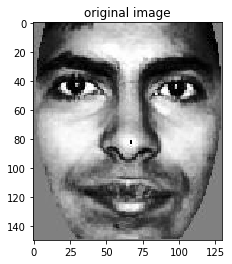

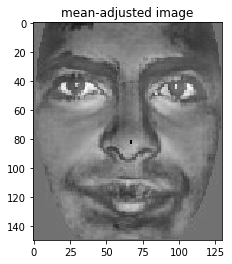

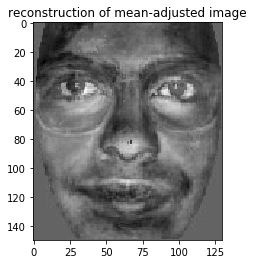

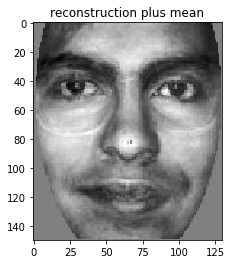

In [40]:
# confirming we can mostly reconstruct a random face using k eigvecs

plt.figure()
plt.title('original image')
plt.imshow(rand_face,cmap='gray')

expected_face = mean_adj_rand_face.reshape(150,130)
plt.figure()
plt.title('mean-adjusted image')
plt.imshow(expected_face,cmap='gray')

reconstruction = (k_eigenfaces @ omega).reshape(150,130)
plt.figure()
plt.title('reconstruction of mean-adjusted image')
plt.imshow(reconstruction,cmap='gray')

reconstruction_plus_mean = reconstruction + MEANFACE
plt.figure()
plt.title('reconstruction plus mean')
plt.imshow(reconstruction_plus_mean,cmap='gray')

In [25]:
a.shape

(19500, 44)

In [27]:
all_train_omegas = k_eigenfaces.T @ a
all_train_omegas.shape

(30, 44)

In [43]:
# finding the closest match in the training set
# we chose to use the omega of the random face above as our test image

filename_keys = list(mean_adjusted.keys())
magnitudes = {}

for L in range(0, all_train_omegas.shape[1]):
    key = filename_keys[L]
    omega_L = all_train_omegas[:, L]
    diff_vec = np.subtract(omega, omega_L)
    diff_magnitude = np.linalg.norm(diff_vec)
    magnitudes[key] = [L, diff_magnitude]

key_min = min(magnitudes.keys(), key=(lambda k: (magnitudes[k])[1]))
e_r = (magnitudes[key_min])[1]
min_L = (magnitudes[key_min])[0]

there is a match between the original image and face L = 6
original image filename: 00022fa010.930831.jpg
matched image filename: 00022fa010.930831.jpg


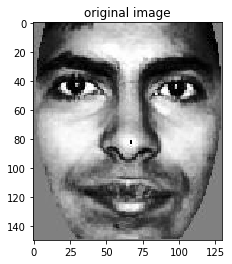

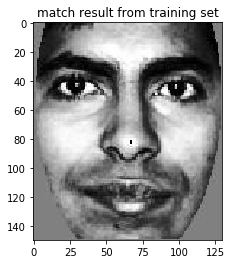

In [48]:
# now let's compare the original face with the match result!

print("there is a match between the original image and face L = " + str(min_L))
print("original image filename: " + str(random_test_filename))
print("matched image filename: " + str(key_min))
plt.figure()
plt.title('original image')
plt.imshow(rand_face,cmap='gray')

plt.figure()
plt.title('match result from training set')
plt.imshow(images[key_min],cmap='gray')